In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [7]:
# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [9]:
# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
# Check for duplicates
print("\nDuplicates:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicates:
Customers: 0
Products: 0
Transactions: 0


In [11]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [12]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# View merged dataset
print("\nMerged Data:\n", merged_data.head())


Merged Data:
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Spea

C:\Users\hp\AppData\Local\Temp\ipykernel_9264\1279412052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


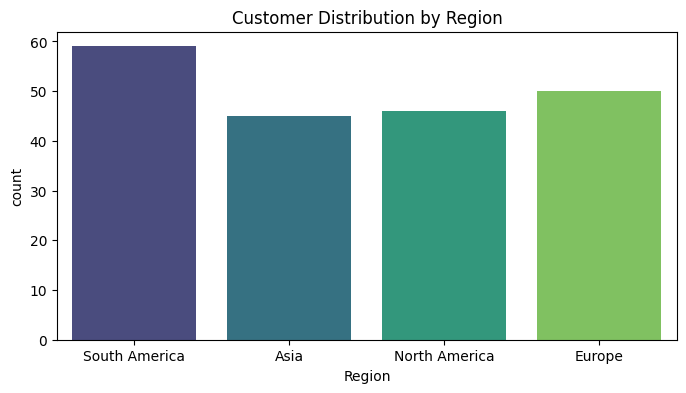

C:\Users\hp\AppData\Local\Temp\ipykernel_9264\1279412052.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='coolwarm')


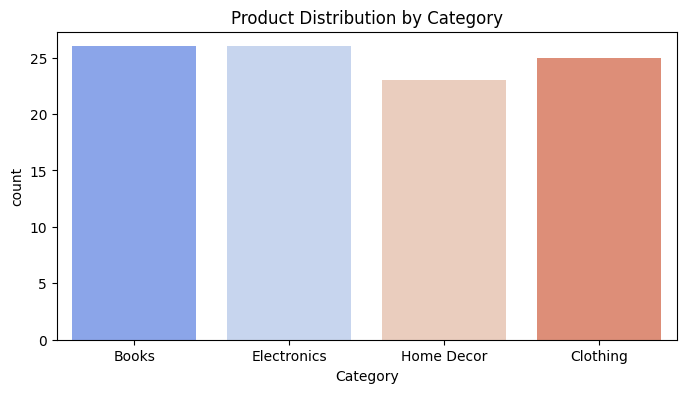

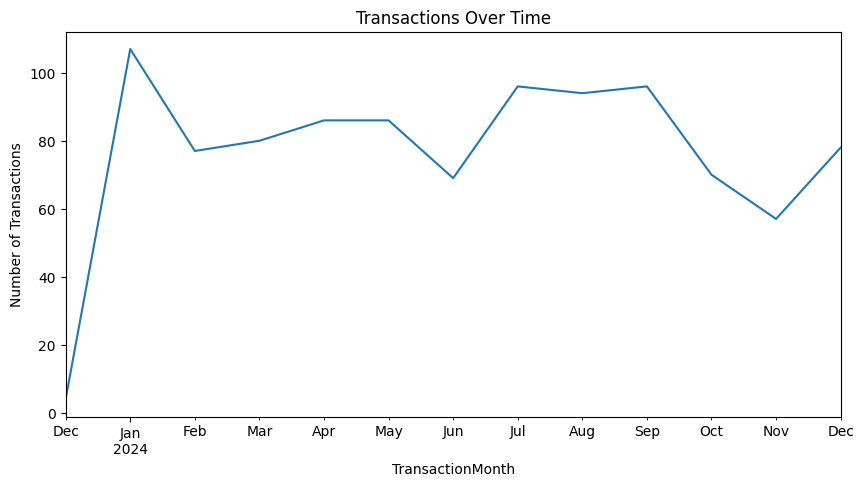

In [13]:
# Region-wise customer distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Customer Distribution by Region")
plt.show()

# Category-wise product distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=products, x='Category', palette='coolwarm')
plt.title("Product Distribution by Category")
plt.show()

# Transaction trends over time
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_transactions = merged_data.groupby('TransactionMonth').size()
monthly_transactions.plot(kind='line', figsize=(10, 5), title='Transactions Over Time')
plt.ylabel('Number of Transactions')
plt.show()


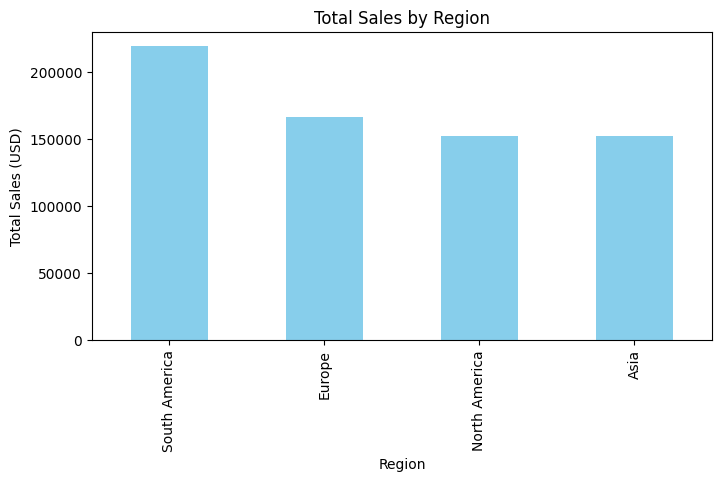

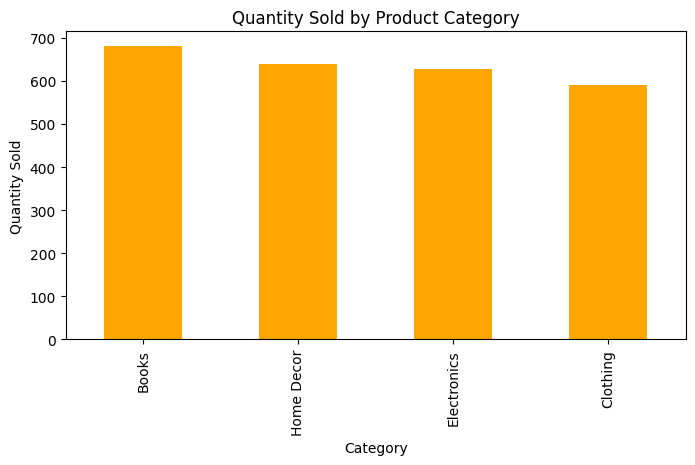

In [17]:
# Region vs. Total Sales
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(8, 4), title='Total Sales by Region', color='skyblue')
plt.ylabel('Total Sales (USD)')
plt.show()

# Category vs. Quantity Sold
category_quantity = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
category_quantity.plot(kind='bar', figsize=(8, 4), title='Quantity Sold by Product Category', color='orange')
plt.ylabel('Quantity Sold')
plt.show()


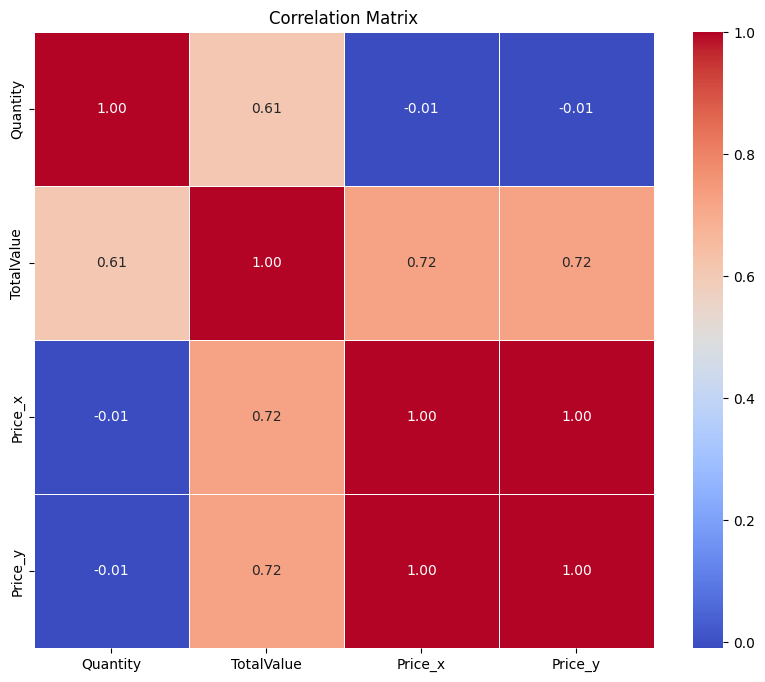

In [18]:
# Select numeric columns for correlation
numeric_data = merged_data.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
